In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Lecturas de Datos

In [19]:
x_train = pd.read_csv("train_ex1data1.csv")
y_train = pd.read_csv("y_train_ex1data1.csv")
x_test = pd.read_csv("test_ex1data1.csv")
y_test = pd.read_csv("y_test_ex1data1.csv")

In [20]:
x_train.head()

,Num_Hab_Ciudad(Miles)
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598


In [21]:
y_train.head()

,Rentabilidad_Ciudad(Miles)
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


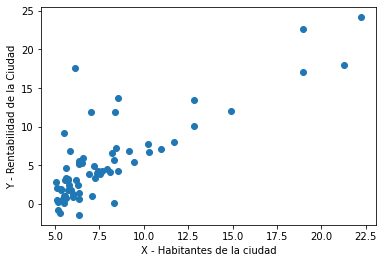

In [22]:
plt.scatter(x_train, y_train)
plt.xlabel('X - Habitantes de la ciudad')
plt.ylabel('Y - Rentabilidad de la Ciudad')
plt.show()

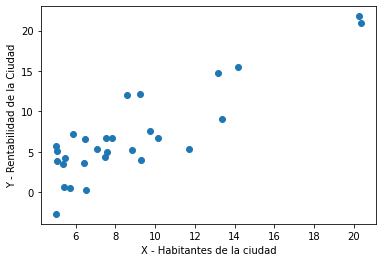

In [23]:
plt.scatter(x_test, y_test)
plt.xlabel('X - Habitantes de la ciudad')
plt.ylabel('Y - Rentabilidad de la Ciudad')
plt.show()

## Normalización

In [24]:
x_whole = np.concatenate((x_train,x_test),axis=0)
y_whole = np.concatenate((y_train,y_test),axis=0)

In [25]:
x_mean = x_whole.mean(axis=0)
x_std = x_whole.std(axis=0)
y_mean= y_whole.mean(axis=0)
y_std= y_whole.std(axis=0)

In [26]:
# Dispersión de una distribución
print("x = ", x_mean, x_std)
print("y = ", y_mean, y_std)

x =  [8.1598] [3.849884]
y =  [5.83913505] [5.48178526]


In [27]:
x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std
y_train = (y_train - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

In [28]:
x_train.shape

(68, 1)

In [29]:
type(x_train)

pandas.core.frame.DataFrame

In [30]:
print(x_train)

    Num_Hab_Ciudad(Miles)
0               -0.532406
1               -0.683683
2                0.093198
3               -0.300425
4               -0.597421
..                    ...
63              -0.805323
64              -0.636928
65              -0.135900
66              -0.741425
67               0.034702

[68 rows x 1 columns]


In [31]:
y_train.shape

(68, 1)

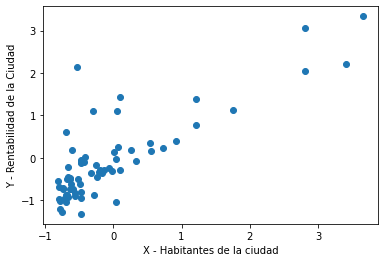

In [32]:
plt.scatter(x_train, y_train)
plt.xlabel('X - Habitantes de la ciudad')
plt.ylabel('Y - Rentabilidad de la Ciudad')
plt.show()

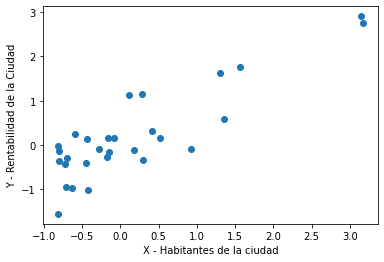

In [33]:
plt.scatter(x_test, y_test)
plt.xlabel('X - Habitantes de la ciudad')
plt.ylabel('Y - Rentabilidad de la Ciudad')
plt.show()

In [34]:
# Añadir la columna de ceros al conjunto de entrenamiento
n_zeros = np.ones([len(x_train), 1])
x_train = np.concatenate((n_zeros, x_train), axis=1)
x_train

array([[ 1.        , -0.53240565],
       [ 1.        , -0.68368294],
       [ 1.        ,  0.09319761],
       [ 1.        , -0.30042464],
       [ 1.        , -0.5974206 ],
       [ 1.        ,  0.0579498 ],
       [ 1.        , -0.63614904],
       [ 1.        , -0.63009691],
       [ 1.        ,  0.06457337],
       [ 1.        , -0.6543314 ],
       [ 1.        , -0.46609197],
       [ 1.        , -0.78695878],
       [ 1.        , -0.51188555],
       [ 1.        , -0.47630007],
       [ 1.        , -0.67402031],
       [ 1.        ,  2.80143506],
       [ 1.        ,  1.21255602],
       [ 1.        ,  0.72656735],
       [ 1.        ,  3.64769432],
       [ 1.        , -0.75519159],
       [ 1.        , -0.40790839],
       [ 1.        , -0.58910866],
       [ 1.        ,  0.01332508],
       [ 1.        , -0.05880697],
       [ 1.        , -0.0165979 ],
       [ 1.        , -0.66326674],
       [ 1.        ,  1.214634  ],
       [ 1.        , -0.46920894],
       [ 1.        ,

## División de los datos (entrenamientos -70% y prueba -30%)

In [35]:
y_train=y_train.to_numpy()

### Costo
- el vector $\theta$

In [36]:
Theta = np.zeros(x_train.shape[1])
print(Theta)

[0. 0.]


**Definiendo la Función de Costo y la función de Hipótesis $H_{\theta}(x)$**
- Función de Costo:
$$
J(\theta)=J(\theta_{0},\theta_{1},\dots,\theta_{n})\\
J(\theta) = \frac{1}{2m}\sum_{i=0}^{m}( h_{\theta}(x^{(i)})-y^{(i)})^{2}
$$
- Hipótesis
$$
h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \dots + \theta_{n}x_{n} = \theta^{T}x
$$
<br>
$$
h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} 
$$

In [37]:
x_train[0]

array([ 1.        , -0.53240565])

In [38]:
np.dot(x_train[0],Theta)

0.0

In [39]:
# Formula de la Hipotesis
def predict(theta, data):
    return np.dot(data, theta)

In [40]:
# Formula de Costo
"""
X_data: inputs vector
Y_result: output vector
theta: tetha vector
"""
def Cost(X_data, Y_result, theta):
    cost = 0
    rows_X = X_data.shape[0]

    for i in range(rows_X):
        cost += (Y_result[i] - predict(theta, X_data[i, :])) ** 2
    return 1.0 / (2 * rows_X) * cost

In [41]:
print("Costo Inicial con Theta 0 0: ", Cost(x_train, y_train, Theta))

Costo Inicial con Theta 0 0:  [0.48454633]


In [42]:
y_initial_predict = []
for i in range(x_train.shape[0]):
#     print(predict(Theta, x_train[i]))
    y_initial_predict.append(predict(Theta, x_train[i]))
y_initial_predict = np.array(y_initial_predict)
y_initial_predict

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

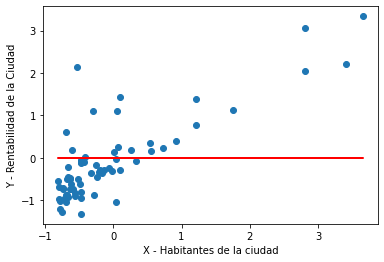

In [43]:
plt.plot(x_train, y_initial_predict, "r-")
plt.scatter(x_train[:,1], y_train)
plt.xlabel('X - Habitantes de la ciudad')
plt.ylabel('Y - Rentabilidad de la Ciudad')
plt.show()

## Gradiente

In [44]:
prediction = np.dot(x_train, Theta)
prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [45]:
prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [46]:
x_train.T.shape

(2, 68)

In [47]:
prediction.shape

(68,)

In [48]:
x_train.shape

(68, 2)

In [50]:
Theta

array([0., 0.])

In [51]:
Theta.shape

(2,)

In [49]:
np.dot(x_train, Theta)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
# gradiente descendiente
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    for it in range(iterations):
        # Hipotesis
        prediction = np.dot(X, theta)  # (68, )
        #         print(prediction.shape)

        y = y.flatten()
        #         print(y.shape)
        theta = theta - learning_rate * (1 / m) * (X.T.dot((prediction - y)))
        theta_history[it, :] = theta.T
        cost_history[it] = Cost(X, y, theta)


    return theta, cost_history, theta_history

In [52]:
Theta

array([0., 0.])

In [103]:
# theta = np.random.randn(2,1)
theta,cost_history,theta_history = gradient_descent(x_train,y_train,Theta,0.08,100)

In [92]:
print("Theta =",theta)
print("Final Cost = ",cost_history[-1])

Theta = [-0.01492917  0.14354696]
Final Cost =  0.38058158019994787


In [104]:
print("Theta =",theta)
print("Final Cost = ",cost_history[-1])

Theta = [-0.03185333  0.83079273]
Final Cost =  0.15712068156347


In [109]:
x_train[0] * [2,0]

array([ 2., -0.])

In [110]:
np.dot(x_train[0] ,[2,0])

2.0

In [111]:
y_predict = []
for x_r in x_train:
    y_predict.append(np.dot(x_r ,theta))
y_predict = np.array(y_predict)
y_predict

array([-4.74172081e-01, -5.99852151e-01,  4.55745657e-02, -2.81443939e-01,
       -5.28186026e-01,  1.62909369e-02, -5.60361332e-01, -5.55333266e-01,
        2.17937559e-02, -5.75467110e-01, -4.19079152e-01, -6.85652967e-01,
       -4.57124132e-01, -4.27559968e-01, -5.91824509e-01,  2.29555856e+00,
        9.75529392e-01,  5.71773538e-01,  2.99862460e+00, -6.59261016e-01,
       -3.70740664e-01, -5.21280528e-01, -2.07829572e-02, -8.07097348e-02,
       -4.56427511e-02, -5.82890520e-01,  9.77255767e-01, -4.21668714e-01,
       -6.25920407e-01, -3.07490616e-01, -5.46766132e-01, -2.62043805e-01,
       -5.40788560e-01,  7.32110577e-01, -5.96852575e-01, -6.47327452e-01,
       -1.90658216e-01, -4.26114129e-01, -4.20481832e-01, -4.38759823e-01,
       -5.75682906e-01,  2.47344595e-01, -6.75035764e-01,  2.79922834e+00,
        1.42438678e+00,  2.29857971e+00, -2.35047622e-01, -2.65602409e-03,
        4.16184029e-01, -6.05959201e-01, -2.09950452e-01, -4.96593371e-01,
       -2.33385987e-01, -

In [117]:
print(y_predict.shape)
print(x_train.shape)
print(x_train[:,1])

(68,)
(68, 2)
[-0.53240565 -0.68368294  0.09319761 -0.30042464 -0.5974206   0.0579498
 -0.63614904 -0.63009691  0.06457337 -0.6543314  -0.46609197 -0.78695878
 -0.51188555 -0.47630007 -0.67402031  2.80143506  1.21255602  0.72656735
  3.64769432 -0.75519159 -0.40790839 -0.58910866  0.01332508 -0.05880697
 -0.0165979  -0.66326674  1.214634   -0.46920894 -0.71506051 -0.33177623
 -0.61978491 -0.27707328 -0.61258989  0.91956017 -0.68007244 -0.74082752
 -0.19114862 -0.47455975 -0.46778033 -0.48978099 -0.65459115  0.33606207
 -0.77417917  3.40768709  1.75283204  2.80507153 -0.2445788   0.03514392
  0.53928898 -0.69103381 -0.2143701  -0.55939348 -0.24257874 -0.16135551
  0.5491594  -0.79277713 -0.77181546 -0.46861152 -0.42699988  0.09283397
  0.26504695 -0.56048442 -0.6855791  -0.80532297 -0.63692828 -0.1359002
 -0.74142494  0.03470234]


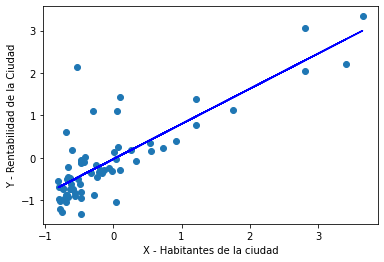

In [118]:
plt.plot(x_train[:,1], y_predict, "b-")
plt.scatter(x_train[:,1], y_train)
plt.xlabel('X - Habitantes de la ciudad')
plt.ylabel('Y - Rentabilidad de la Ciudad')
plt.show()

## Error cuadrático 

In [120]:
print("History Cost = ")
cost_history

History Cost = 


array([0.43660783, 0.39572285, 0.36084829, 0.3310961 , 0.30571011,
       0.28404635, 0.26555632, 0.24977274, 0.23629751, 0.22479137,
       0.21496516, 0.20657241, 0.199403  , 0.19327776, 0.18804387,
       0.18357102, 0.17974802, 0.17648002, 0.17368607, 0.17129708,
       0.1692541 , 0.16750678, 0.16601215, 0.16473349, 0.16363947,
       0.16270331, 0.16190212, 0.16121637, 0.16062935, 0.16012679,
       0.15969649, 0.15932801, 0.15901244, 0.15874215, 0.15851061,
       0.15831226, 0.15814231, 0.15799668, 0.15787188, 0.15776491,
       0.15767323, 0.15759464, 0.15752726, 0.15746948, 0.15741994,
       0.15737746, 0.15734103, 0.15730977, 0.15728297, 0.15725997,
       0.15724024, 0.15722331, 0.15720878, 0.15719631, 0.15718562,
       0.15717643, 0.15716855, 0.15716178, 0.15715597, 0.15715099,
       0.1571467 , 0.15714303, 0.15713987, 0.15713716, 0.15713483,
       0.15713283, 0.15713111, 0.15712963, 0.15712836, 0.15712727,
       0.15712634, 0.15712553, 0.15712484, 0.15712425, 0.15712